In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Hackathon_Working_Data.csv")

In [3]:
df.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [4]:
df.shape

(26985, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [6]:
df.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


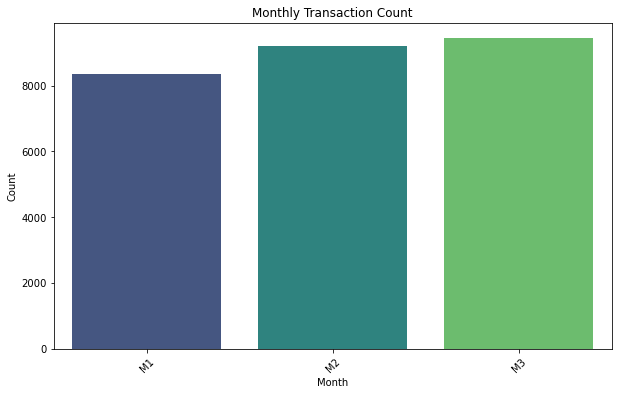

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MONTH', data=df, palette='viridis')
plt.title('Monthly Transaction Count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

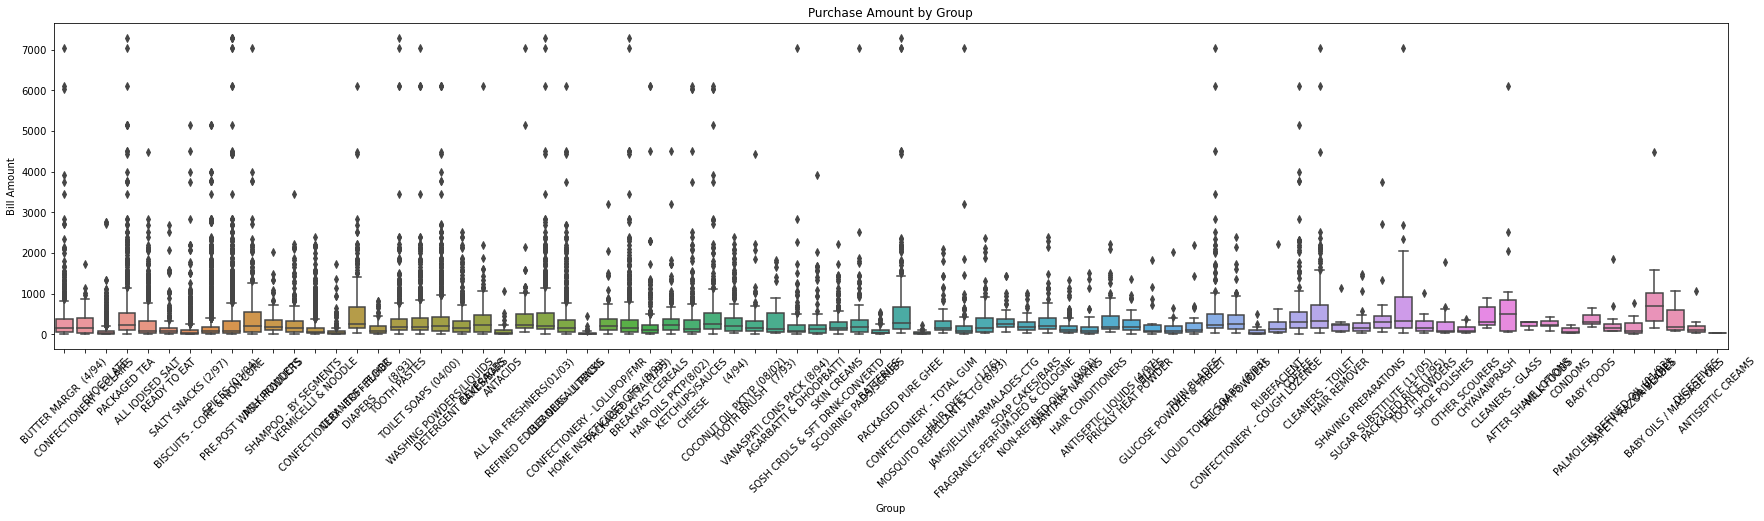

In [8]:
plt.figure(figsize=(30, 6))
sns.boxplot(x='GRP', y='BILL_AMT', data=df)
plt.title('Purchase Amount by Group')
plt.xlabel('Group')
plt.ylabel('Bill Amount')
plt.xticks(rotation=45)
plt.show()

In [9]:
total_spending = df.groupby('BILL_ID')['BILL_AMT'].sum().reset_index()


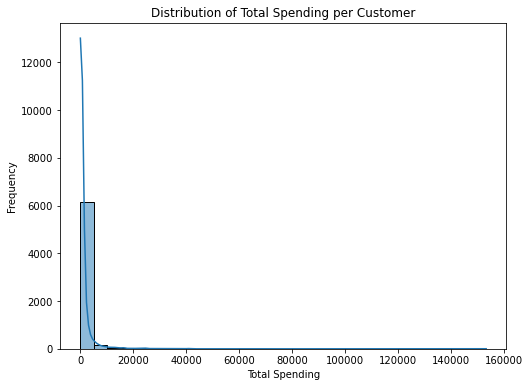

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(total_spending['BILL_AMT'], bins=30, kde=True)
plt.title('Distribution of Total Spending per Customer')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

In [11]:
monthly_avg_spending = df.groupby('MONTH')['BILL_AMT'].mean().reset_index()


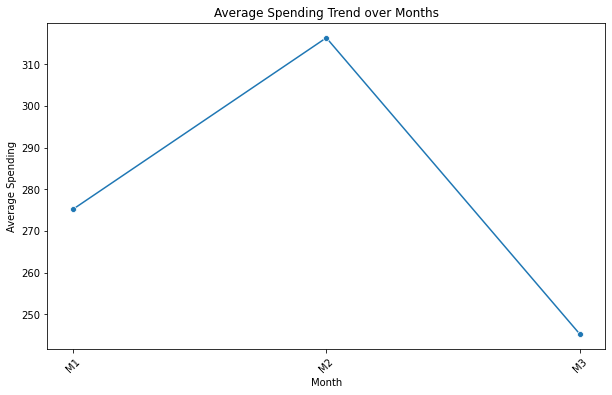

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTH', y='BILL_AMT', data=monthly_avg_spending, marker='o')
plt.title('Average Spending Trend over Months')
plt.xlabel('Month')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

In [13]:
top_spenders = total_spending.nlargest(10, 'BILL_AMT')
print("Top 10 high-value customers:")
print(top_spenders)

Top 10 high-value customers:
     BILL_ID   BILL_AMT
4536    T577  153377.75
4793    T631  129038.50
1203    T211   67270.00
6133    T880   66261.00
593    T1533   66103.00
2125   T3015   53999.00
1230    T214   49775.00
68      T106   46273.00
3157    T400   42060.80
580    T1521   41352.10


In [14]:
transaction_count = df.groupby('BILL_ID')['BILL_ID'].count().reset_index(name='Transaction_Count')


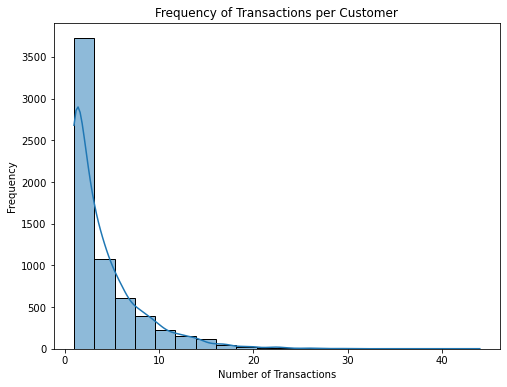

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(transaction_count['Transaction_Count'], bins=20, kde=True)
plt.title('Frequency of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

In [16]:
high_frequency_customers = transaction_count.nlargest(10, 'Transaction_Count')


In [17]:
print("Top 10 high-frequency customers:")
print(high_frequency_customers)

Top 10 high-frequency customers:
     BILL_ID  Transaction_Count
580    T1521                 44
5702   T7794                 35
4793    T631                 33
2416   T3293                 31
4536    T577                 30
3157    T400                 29
5654     T77                 29
68      T106                 28
556     T150                 27
1230    T214                 26


In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [26]:
data_for_clustering = df[['BILL_AMT', 'QTY']]


In [27]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)


In [28]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

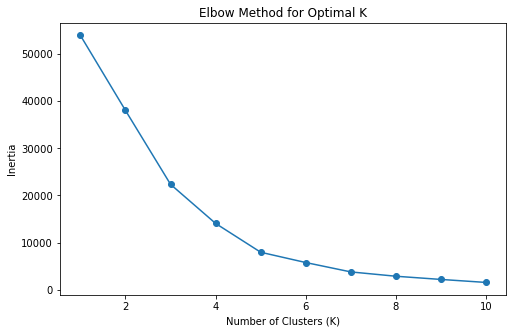

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
df['Cluster'] = kmeans.labels_

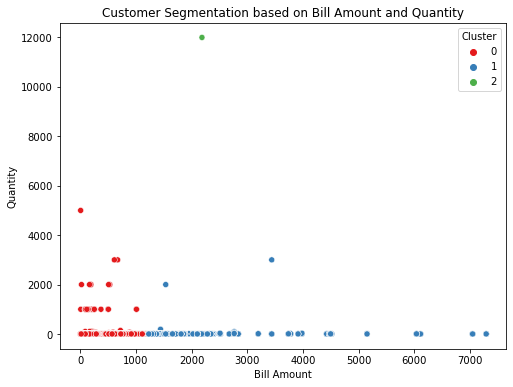

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BILL_AMT', y='QTY', hue='Cluster', data=df, palette='Set1', legend='full')
plt.title('Customer Segmentation based on Bill Amount and Quantity')
plt.xlabel('Bill Amount')
plt.ylabel('Quantity')
plt.show()

In [34]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [35]:
basket = df.groupby(['BILL_ID', 'GRP'])['BILL_ID'].count().unstack().reset_index().fillna(0).set_index('BILL_ID')


In [36]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [37]:
basket_sets = basket.applymap(encode_units)


In [39]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

C:\Users\skrsg\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [40]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(AGARBATTI & DHOOPBATTI),(BISCUITS - CORE & NON CORE),0.017746,0.474626,0.010274,0.578947,1.219796,0.001851,1.247762,0.183446
1,(BISCUITS - CORE & NON CORE),(AGARBATTI & DHOOPBATTI),0.474626,0.017746,0.010274,0.021646,1.219796,0.001851,1.003987,0.342976
2,(ALL IODISED SALT),(BISCUITS - CORE & NON CORE),0.068026,0.474626,0.035492,0.521739,1.099263,0.003205,1.098508,0.096890
3,(BISCUITS - CORE & NON CORE),(ALL IODISED SALT),0.474626,0.068026,0.035492,0.074779,1.099263,0.003205,1.007298,0.171877
4,(ALL IODISED SALT),(CLEANERS - UTENSIL),0.068026,0.090753,0.012920,0.189931,2.092828,0.006747,1.122432,0.560292
